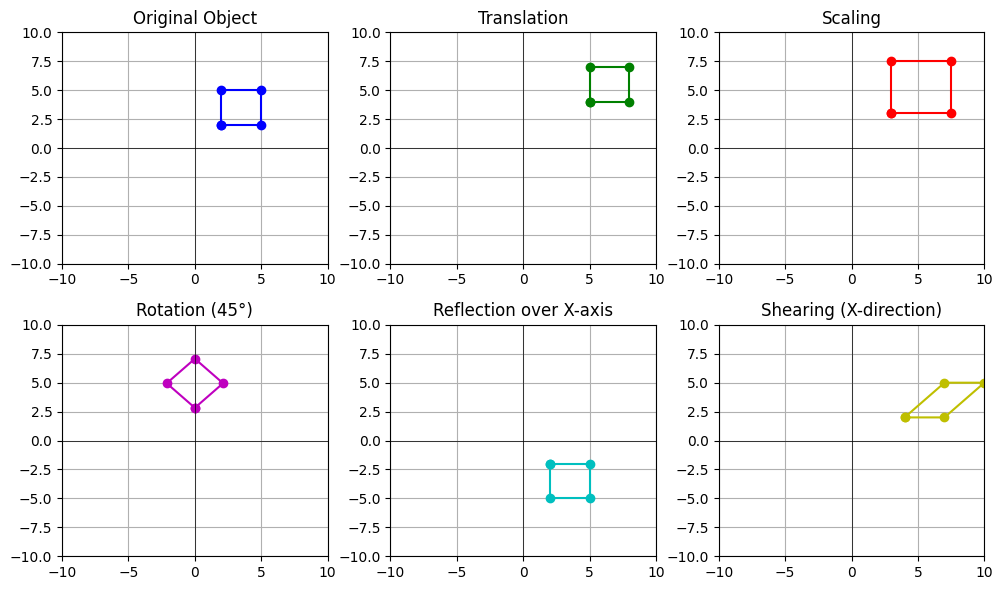

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_object(points, title="2D Transformation", color='b'):
    points = np.append(points, points[:, [0]], axis=1)  # Close the shape
    plt.plot(points[0], points[1], color+'-o')
    plt.title(title)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

def translate(points, tx, ty):
    T = np.array([[1, 0, tx],
                  [0, 1, ty],
                  [0, 0, 1]])
    return apply_transformation(points, T)

def scale(points, sx, sy):
    S = np.array([[sx, 0, 0],
                  [0, sy, 0],
                  [0, 0, 1]])
    return apply_transformation(points, S)

def rotate(points, angle):
    theta = np.radians(angle)
    R = np.array([[np.cos(theta), -np.sin(theta), 0],
                  [np.sin(theta), np.cos(theta), 0],
                  [0, 0, 1]])
    return apply_transformation(points, R)

def reflect(points, axis):
    if axis == 'x':
        R = np.array([[1, 0, 0],
                      [0, -1, 0],
                      [0, 0, 1]])
    elif axis == 'y':
        R = np.array([[-1, 0, 0],
                      [0, 1, 0],
                      [0, 0, 1]])
    else:
        raise ValueError("Axis must be 'x' or 'y'")
    return apply_transformation(points, R)

def shear(points, shx, shy):
    H = np.array([[1, shx, 0],
                  [shy, 1, 0],
                  [0, 0, 1]])
    return apply_transformation(points, H)

def apply_transformation(points, T):
    ones = np.ones((1, points.shape[1]))
    homogeneous_points = np.vstack((points, ones))
    transformed_points = np.dot(T, homogeneous_points)
    return transformed_points[:2]

# Define a 2D object (rectangle)
rectangle = np.array([[2, 5, 5, 2],
                      [2, 2, 5, 5]])

plt.figure(figsize=(10, 6))
plt.subplot(231)
plot_object(rectangle, "Original Object", 'b')

# Apply transformations
translated = translate(rectangle, 3, 2)
plt.subplot(232)
plot_object(translated, "Translation", 'g')

scaled = scale(rectangle, 1.5, 1.5)
plt.subplot(233)
plot_object(scaled, "Scaling", 'r')

rotated = rotate(rectangle, 45)
plt.subplot(234)
plot_object(rotated, "Rotation (45°)", 'm')

reflected = reflect(rectangle, 'x')
plt.subplot(235)
plot_object(reflected, "Reflection over X-axis", 'c')

sheared = shear(rectangle, 1, 0)
plt.subplot(236)
plot_object(sheared, "Shearing (X-direction)", 'y')

plt.tight_layout()
plt.show()


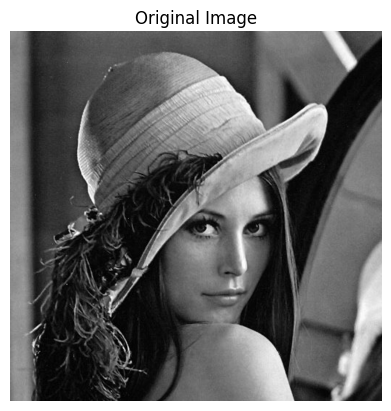

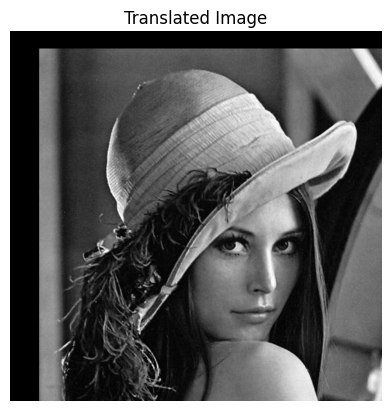

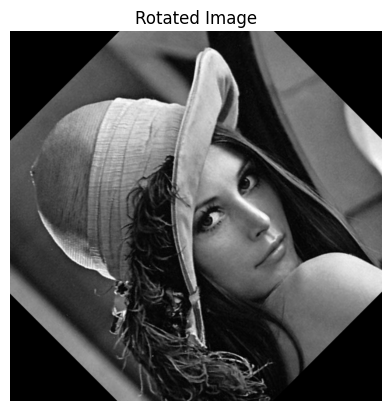

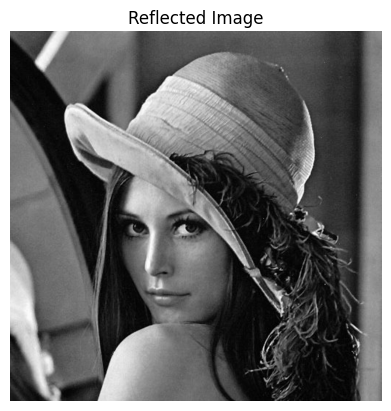

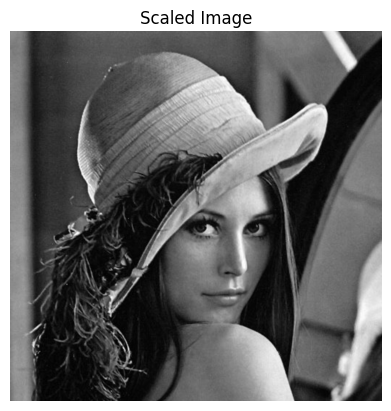

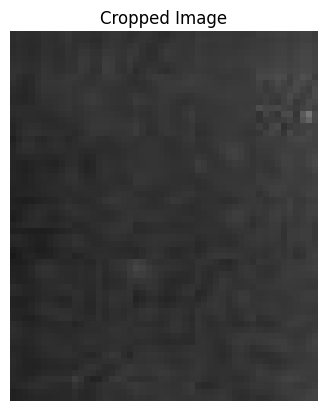

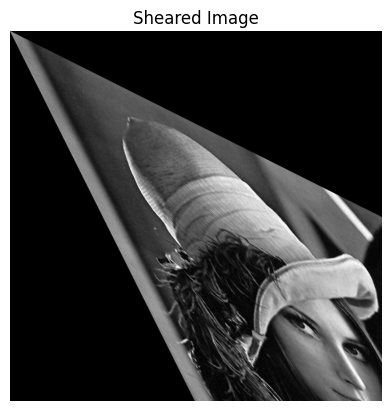

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(title, image):
    plt.figure()
    plt.title(title)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Load an image
image = cv2.imread('/content/your_image.png')
show_image("Original Image", image)

# Translation
tx, ty = 50, 30
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
show_image("Translated Image", translated_image)

# Rotation
angle = 45
center = (image.shape[1] // 2, image.shape[0] // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
show_image("Rotated Image", rotated_image)

# Reflection
flipped_image = cv2.flip(image, 1)  # Horizontal flip
show_image("Reflected Image", flipped_image)

# Scaling
scaled_image = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
show_image("Scaled Image", scaled_image)

# Cropping
cropped_image = image[40:100, 50:100]
show_image("Cropped Image", cropped_image)

# Shearing
M = np.float32([[1, 0.5, 0], [0.5, 1, 0]])
sheared_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
show_image("Sheared Image", sheared_image)